### Real Data Examples

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import tables
import time

ModuleNotFoundError: No module named 'tables'

In [2]:
t0 = time.time()
filetxt = np.loadtxt("data/particles.txt", skiprows=1)
t1 = time.time()
print (t1 - t0)

3.3479933738708496


In [3]:
t0 = time.time()
file = tables.open_file("data/particles.h5", "r")
t1 = time.time()
print (t1 - t0)

0.0060007572174072266


In [4]:
file.root

/ (RootGroup) ''
  children := ['particles' (Array)]

In [5]:
file.root.particles

/particles (Array(50000, 7)) ''
  atom := Float32Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None

In [6]:
particles = file.root.particles.read()

In [7]:
particles.shape

(50000, 7)

In [8]:
particles[:,0].shape

(50000,)

In [9]:
x = particles[:,0] * 1e3
xp = particles[:,1] * 1e3
y = particles[:,2] * 1e3
yp = particles[:,3] * 1e3

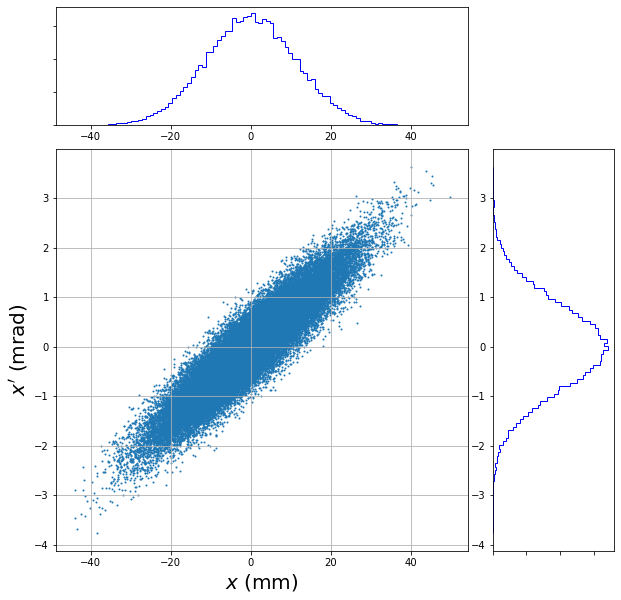

In [10]:
fig = plt.figure(figsize=(10,10))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, xp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=20)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=20)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp, 100, histtype='step', orientation='horizontal', color='b')
        
plt.show()

In [11]:
file2 = tables.open_file("data/diagnostics.h5", "r")

In [12]:
file2.root

/ (RootGroup) ''
  children := ['charge' (Array), 'corr' (EArray), 'emitx' (EArray), 'emitxy' (EArray), 'emitxyz' (EArray), 'emity' (EArray), 'emitz' (EArray), 'mass' (Array), 'max' (EArray), 'mean' (EArray), 'min' (EArray), 'mom2' (EArray), 'num_particles' (EArray), 'pz' (EArray), 'real_num_particles' (EArray), 'repetition' (EArray), 's' (EArray), 's_n' (EArray), 'std' (EArray)]

In [13]:
file2.root.charge

/charge (Array()) ''
  atom := Int32Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None

In [14]:
file2.root.emitx

/emitx (EArray(25801,)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (1024,)

In [15]:
file2.root.emitx.read()

array([3.90000000e-06, 3.90000412e-06, 3.90006339e-06, ...,
       4.16071216e-06, 4.23855840e-06, 4.23855835e-06])

In [16]:
s = file2.root.s.read()
emitx = file2.root.emitx.read() * 1e6
file2.close()

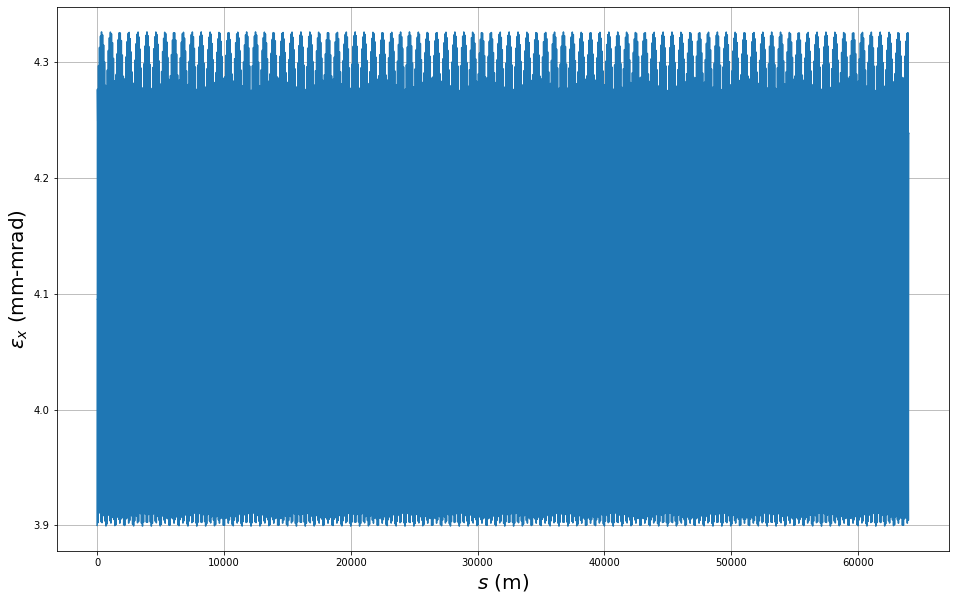

In [17]:
fig = plt.figure(figsize=(16,10))

plt.plot(s, emitx)
plt.xlabel(r'$s$ (m)', fontsize=20)
plt.ylabel(r'$\epsilon_{x}$ (mm-mrad)', fontsize=20)
#plt.xlim([0,640])
plt.grid()

plt.show()

In [20]:
file3 = tables.open_file("data/twiss.h5", "r")

In [21]:
file3.root

/ (RootGroup) ''
  children := ['D_x' (Array), 'D_y' (Array), 'Dprime_x' (Array), 'Dprime_y' (Array), 'alpha_x' (Array), 'alpha_y' (Array), 'beta_x' (Array), 'beta_y' (Array), 'length' (Array), 'name' (UnImplemented), 'psi_x' (Array), 'psi_y' (Array), 's' (Array)]

In [22]:
file3.root.beta_x

/beta_x (Array(1287,)) ''
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None

In [23]:
s = file3.root.s.read()
beta_x = file3.root.beta_x.read()
alpha_x = file3.root.alpha_x.read()
D_x = file3.root.D_x.read()

In [24]:
file3.close()

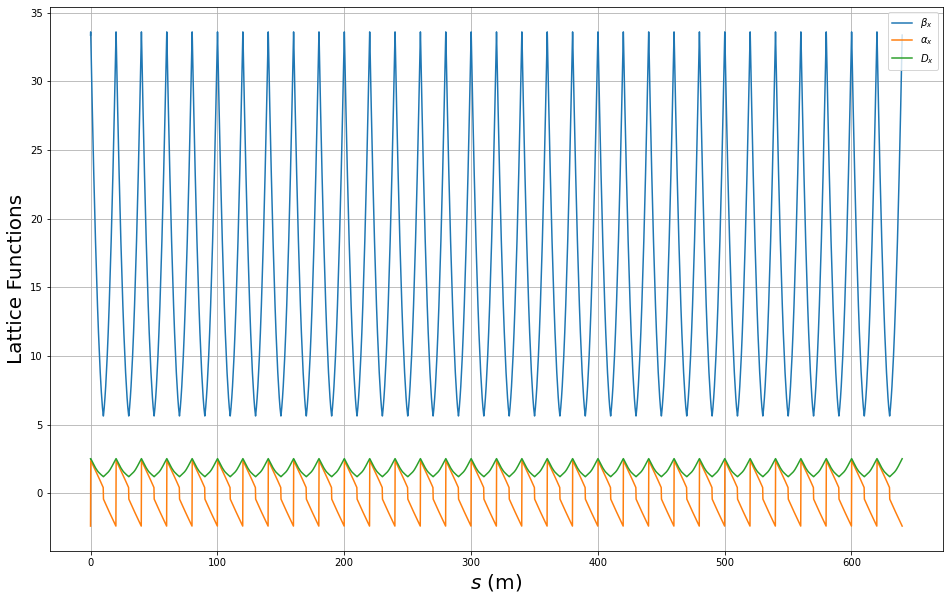

In [25]:
fig = plt.figure(figsize=(16,10))

plt.plot(s, beta_x, label=r'$\beta_{x}$')
plt.plot(s, alpha_x, label=r'$\alpha_{x}$')
plt.plot(s, D_x, label=r'$D_{x}$')
plt.xlabel(r'$s$ (m)', fontsize=20)
plt.ylabel('Lattice Functions', fontsize=20)
plt.legend(loc=1)
plt.grid()

plt.show()

In [26]:
file4 = tables.open_file("data/particles_0093.h5", "r")
file4.root

/ (RootGroup) ''
  children := ['charge' (Array), 'mass' (Array), 'particles' (EArray), 'pz' (Array), 'rep' (Array), 's_n' (Array), 'tlen' (Array)]

In [27]:
paritcles = file4.root.particles.read()
particles.shape
file4.close()

In [28]:
x = particles[:,0]
xp = particles[:,1]

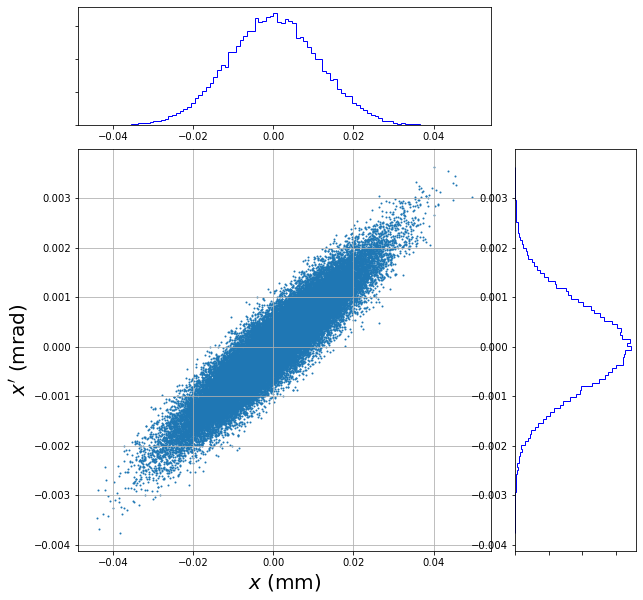

In [29]:
fig = plt.figure(figsize=(10,10))

grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[1:,:3])
x_hist = fig.add_subplot(grid[0,:3], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[1:,3], xticklabels=[], sharey=main_ax)

# scatter points on the main axes
main_ax.scatter(x, xp, s=1)#, 'ob', markersize=3, alpha=0.2)
main_ax.set_xlabel(r'$x$ (mm)', fontsize=20)
main_ax.set_ylabel(r'$x^{\prime}$ (mrad)', fontsize=20)
main_ax.grid()

# histogram on the attached axes
x_hist.hist(x, 100, histtype='step', orientation='vertical', color='b')
y_hist.hist(xp, 100, histtype='step', orientation='horizontal', color='b')
        
plt.show()